In [1]:
#import dependencies 

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter('ignore')


In [2]:
# read in unified CSV

raw_economic_data = pd.read_csv('econ_happy_data_allyears.csv')



In [3]:
raw_economic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 16 columns):
Unnamed: 0                                                           215 non-null int64
Avg. Wages (Annual)                                                  215 non-null int64
Avg. Work Hours (Annual)                                             215 non-null int64
Confidence in national government                                    215 non-null int64
Delivery Quality                                                     215 non-null int64
Democratic Quality                                                   215 non-null int64
Freedom to make life choices                                         215 non-null int64
GDP (constant 2010 US$)                                              215 non-null int64
Healthy life expectancy at birth                                     215 non-null int64
Happiness Index                                                      215 non-null int64
Log GDP per cap

In [4]:
# limit columns to only strongest features 

narrow_econ_data = raw_economic_data[["Avg. Wages (Annual)",
                   "Population density (people per sq. km of land area)",
                   "GDP (constant 2010 US$)", 
                   "Happiness Index"]]

narrow_econ_data.head()


,Avg. Wages (Annual),Population density (people per sq. km of land area),GDP (constant 2010 US$),Happiness Index
0,52252,2,1144260000000,7
1,50096,101,391893000000,7
2,50872,359,483548000000,6
3,45502,3,1613460000000,7
4,24960,22,218538000000,6


In [5]:
# rename columns for easier visualization

rev_narrow_econ_data = narrow_econ_data.rename(columns={"Avg. Wages (Annual)": "Avgerage Wages",
                                                       "Population density (people per sq. km of land area)": "Population Density",
                                                       "GDP (constant 2010 US$)": "GDP"})



In [6]:
# assign X (data) and y (target)

X = rev_narrow_econ_data.drop("Happiness Index", axis=1)
y = rev_narrow_econ_data["Happiness Index"]
print(X.shape, y.shape)


(215, 3) (215,)


In [7]:
# establish variable to hold feature names (the names of the remaining columns)

feature_names = X.columns


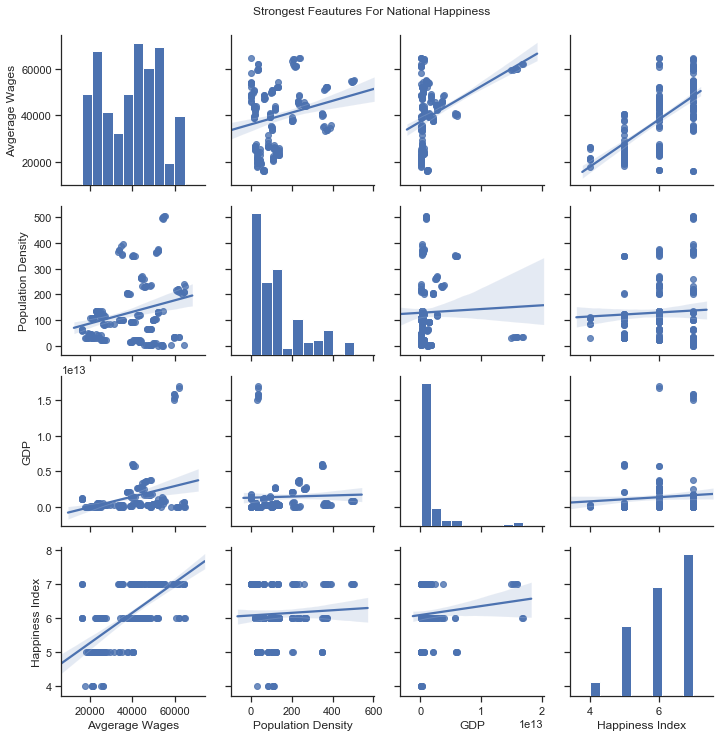

In [8]:
# visualize data prior to splitting

p = sns.pairplot(rev_narrow_econ_data, kind="reg")
p.fig.suptitle("Strongest Feautures For National Happiness", y=1.02)
p.savefig("happiness_pairplot.png")


In [9]:
# split data into training and testing 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [10]:
# create a random forest classifier

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.7962962962962963

In [11]:
# calculate feature importance

importances = rf.feature_importances_
importances


array([0.36720122, 0.31910533, 0.31369346])

In [12]:
# sort the features by their importance

sorted(zip(rf.feature_importances_, feature_names), reverse=True)


[(0.36720121727546523, 'Avgerage Wages'),
 (0.31910532748725373, 'Population Density'),
 (0.3136934552372811, 'GDP')]

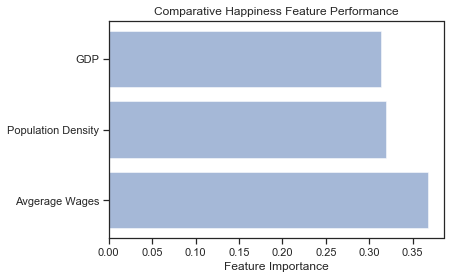

In [13]:
# plot feature importance 

objects = feature_names
y_pos = np.arange(len(objects))
importance = importances

plt.barh(y_pos, importance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Feature Importance')
plt.title('Comparative Happiness Feature Performance')

plt.show()